# **Assigment 1**

## **Challenge 2**

Problems:
1.   What is the approximative time of the merger? (Hint: a plot of the q-transform could help)
2.   Generate a time-domain template waveform using approximate "SEOBNRv4_opt". with the same parameters as above. Plot this waveform.
3.   Calculate a PSD of the data, and plot this on a log-log scale. Use axes ranging from 20 Hz up to the Nyquist frequency.
4.   Use the template waveform and PSD to calculate the SNR time series. Plot the SNR time-series.
5.   What is the matched filter SNR of the signal?

Solutions:
1.   The time of the merger is approximately 4.4s or in GPS time 4.4-19=-14.6s.
2.   For the plot of the waveform, see the code and its result.
3.   For the plot of the PSD, see the code and its result.
4.   For the plot of the SNR, see the code and its result.
5.   We found a signal at -14.6328125s with SNR 22.050839878738312

### Code for problem 1

Installing pycbc and gwpy module.

In [ ]:
# This installs the pycbc and gwpy module to be used
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0' 
! pip install -q 'gwpy==2.0.2'

     |████████████████████████████████| 27.3 MB 1.5 MB/s 
     |████████████████████████████████| 6.3 MB 22.7 MB/s 
     |████████████████████████████████| 1.4 MB 54.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51 kB 5.6 MB/s 
     |████████████████████████████████| 201 kB 44.1 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 295 kB 57.8 MB/s 
     |████████████████████████████████| 3.6 MB 37.1 MB/s 
     |████████████████████████████████| 1.4 MB 5.3 MB/s 


Importing the datafile.

In [ ]:
from pycbc.frame import read_frame
import urllib.request

# Function to retrieve the data files
def get_file(fname):
    url = "https://www.gw-openscience.org/s/workshop3/challenge/{}"
    url = url.format(fname) #this finishes the url link to be the link to the file that is wanted
    urllib.request.urlretrieve(url, fname) #this retrieves the file
    print('Getting : {}'.format(url))

# Add here which files you want to get
files = ['challenge2.gwf']

# This will get the files you entered above
for fname in files: 
    get_file(fname)
    
file_name = "challenge2.gwf"
channel_name = "H1:CHALLENGE2"

ts = read_frame(file_name, channel_name)
print(ts.start_time)
print(ts.end_time)

Getting : https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
-64
64


Let's do a q-transform as in challenge 1.4. Let's first do this without specifying start and end times, to get the whole picture, and then add these in to zoom in on the observed signal.

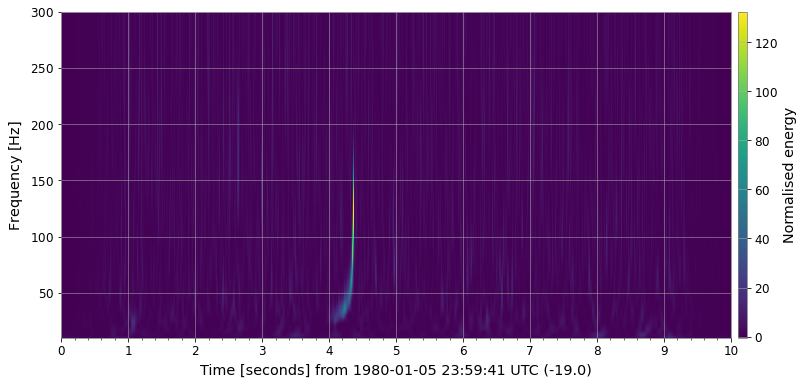

In [ ]:
from gwpy.timeseries import TimeSeries

data = TimeSeries.read("challenge2.gwf", channel="H1:CHALLENGE2", start=ts.start_time+45, end=ts.start_time+55)

hq = data.q_transform(frange=(10, 300))
plot = hq.plot()
ax = plot.gca()
ax.colorbar(label="Normalised energy")

### Code for problem 2

Importing needed modules.

In [ ]:
%matplotlib inline
from pycbc.waveform import get_td_waveform
import pylab

Below is the code for the waveform and plotting this.

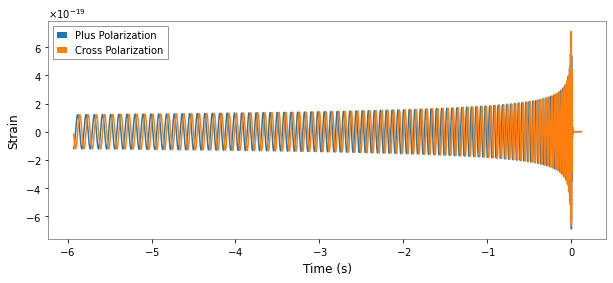

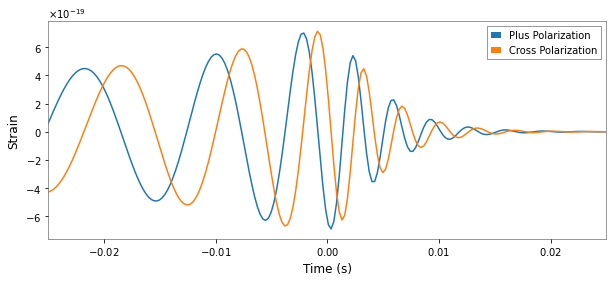

In [59]:
from pycbc.frame import frame

Data = frame.read_frame("challenge2.gwf", "H1:CHALLENGE2")

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30, #both m1 and m2 are 30 solar masses
                         delta_t=Data.delta_t,
                         f_lower=10) #as in 2.1, where we start at a frequency of 10Hz

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Let's zoom in near the merger time and plot both
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.025, .025) #bounderies were found by trial and error until the merger was well visible
pylab.legend()
pylab.grid()
pylab.show()

### Code for problem 3

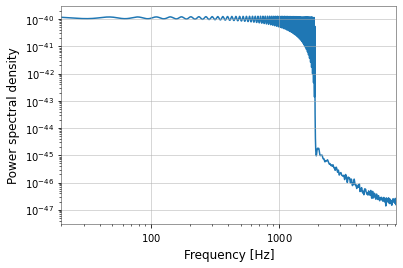

In [60]:
from pycbc.psd import interpolate, inverse_spectrum_truncation

psd = Data.psd(4)
psd = interpolate(psd, Data.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * Data.sample_rate),
                                  low_frequency_cutoff=15)

f_Nyquist = 8192 #Hz
pylab.loglog(psd)
pylab.xlim(xmin=20, xmax=f_Nyquist)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density')
pylab.show()

### Code for problem 4

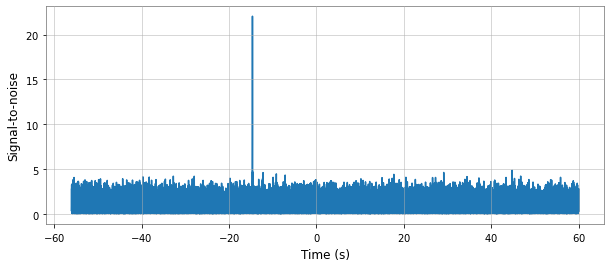

We found a signal at -14.6328125s with SNR 22.050839878738312


In [62]:
from pycbc.filter import matched_filter
import numpy

hp.resize(len(Data))
template = hp.cyclic_time_shift(hp.start_time)

snr = matched_filter(template, Data,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))